In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")
from statsmodels.formula.api import ols

In [81]:
data = pd.read_csv('file:///Users/chrisfiorentine/Downloads/data.csv', index_col=0)

In [29]:
data.isnull().mean()

ID                0.000000
Name              0.000000
Age               0.000000
Photo             0.000000
Nationality       0.000000
                    ...   
GKHandling        0.002636
GKKicking         0.002636
GKPositioning     0.002636
GKReflexes        0.002636
Release Clause    0.085901
Length: 88, dtype: float64

In [30]:
data.shape

(18207, 88)

In [31]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [32]:
data.corr()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,-0.082323,-0.106815,-0.136279,-0.159915,-0.030340,-0.169511,-0.199549,-0.186764,-0.100184,0.133236,0.132437,-0.019897,-0.408617,0.048463,-0.166133,-0.169369,-0.053895,-0.259756,-0.161549,-0.228329,-0.160602,-0.088330,-0.215170,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.082443,0.187422,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.356493,0.498894,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.245616,0.348141,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,0.724244,0.644421,0.906729,0.773974,0.874274,0.851900,0.806414,0.846302,0.912107,0.654337,0.645963,0.699673,0.597169,0.586788,0.835277,0.321846,0.792762,0.192990,0.840049,0.666236,0.561676,0.824307,0.761992,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,0.178373,0.157483,0.242803,0.243089,0.179041,0.233681,0.223564,0.239525,0.217946,0.044319,0.044070,0.100869,0.445614,0.050076,0.227772,0.120931,0.094780,0.131280,0.213960,0.173327,0.129586,0.183003,0.284600,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,0.357416,0.183238,0.322133,0.357340,0.352658,0.345468,0.330472,0.277174,0.356383,0.261435,0.248822,0.302062,0.201341,0.254022,0.332855,0.069752,0.232094,-0.008470,0.355967,0.131524,0.053097,0.346896,0.337897,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,0.743439,0.443005,0.730363,0.745077,0.839757,0.771052,0.701068,0.622342,0.818051,0.652356,0.624098,0.681765,0.377044,0.578459,0.718237,0.107553,0.570226,-0.041475,0.752980,0.347795,0.209604,0.781248,0.674057,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,-0.006639,-0.091688,-0.100241,-0.026731,-0.028021,-0.055428,-0.068843,-0.117424,-0.073210,-0.004395,-0.015069,-0.034158,-0.192622,0.008009,-0.053860,-0.104179,-0.127822,-0.158

In [82]:
data['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [35]:
data['Work Rate']

0        Medium/ Medium
1             High/ Low
2          High/ Medium
3        Medium/ Medium
4            High/ High
              ...      
18202    Medium/ Medium
18203    Medium/ Medium
18204    Medium/ Medium
18205    Medium/ Medium
18206    Medium/ Medium
Name: Work Rate, Length: 18207, dtype: object

In [36]:
data['International Reputation']

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: International Reputation, Length: 18207, dtype: float64

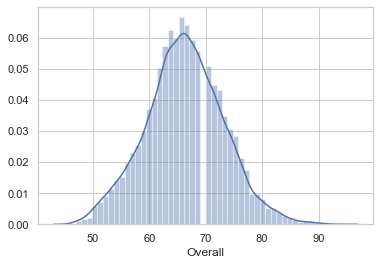

In [37]:
sns.distplot(data['Overall'])

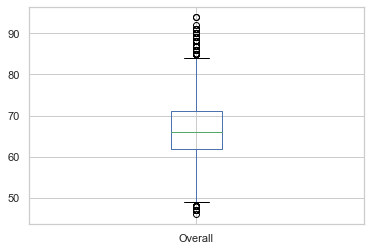

In [73]:
data.boxplot(['Overall'])

In [88]:
data.Wage = data['Wage'].apply(lambda x: x.strip('K'))
data.Wage = data['Wage'].apply(lambda x: x.strip('€'))
data.Wage = data['Wage'].apply(lambda x: float(x))

In [83]:
data = pd.get_dummies(data, columns = ['International Reputation'], drop_first = True)
data = pd.get_dummies(data, columns = ['Weak Foot', 'Skill Moves','Work Rate'], drop_first = True)

In [89]:
cols =[]
for i in data.corr():
    cols.append(i)

In [90]:
cols.remove('ID')

In [91]:
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

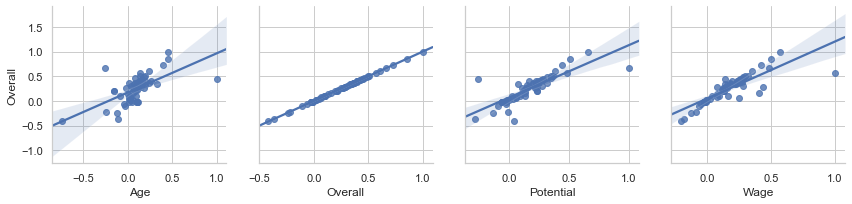

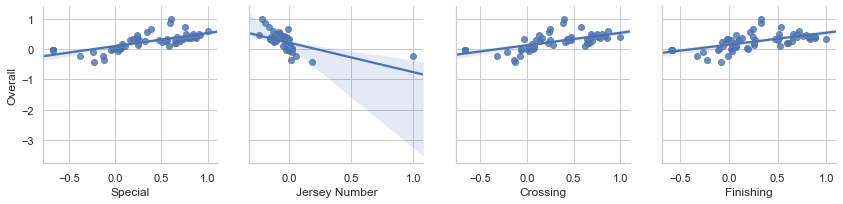

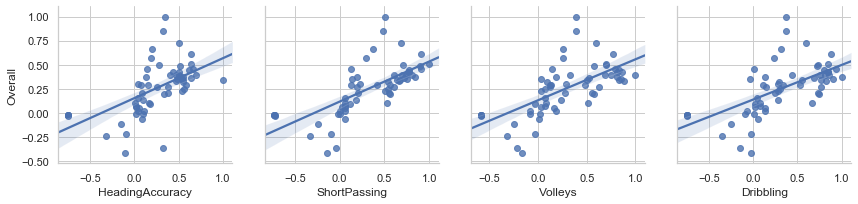

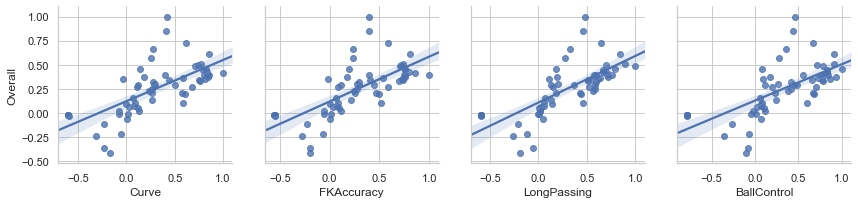

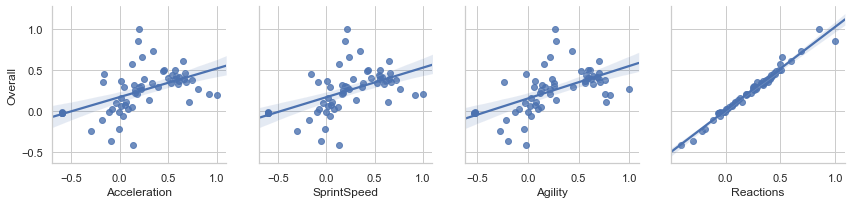

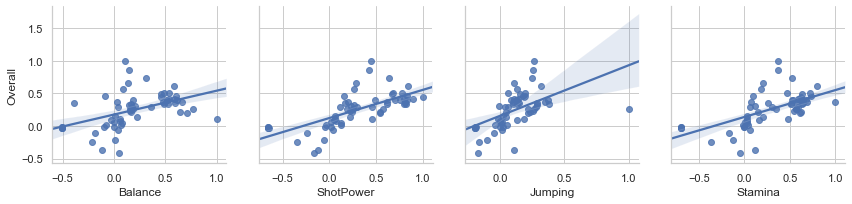

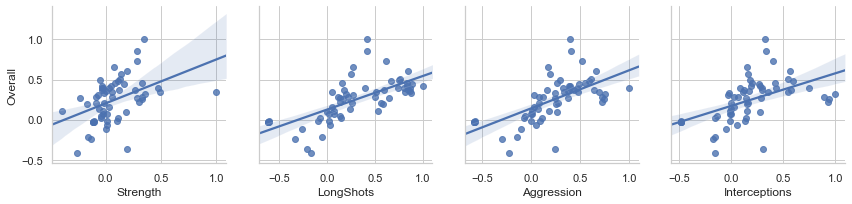

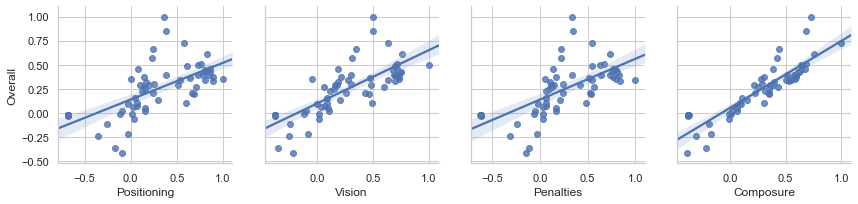

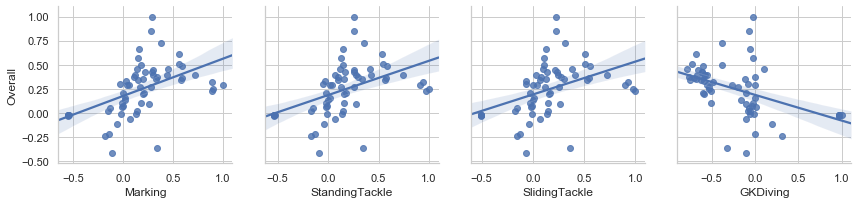

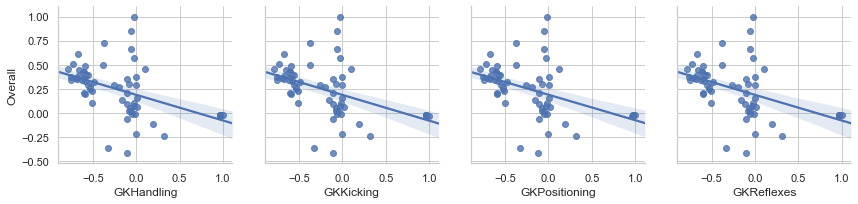

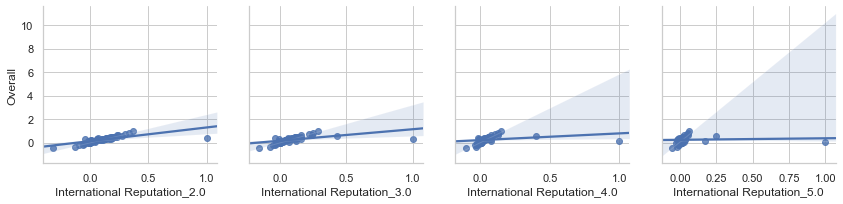

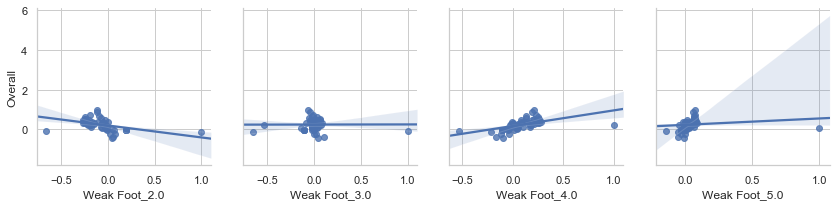

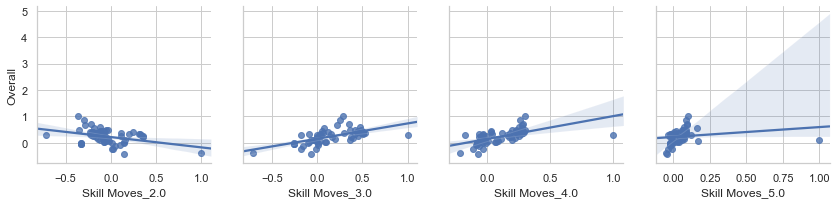

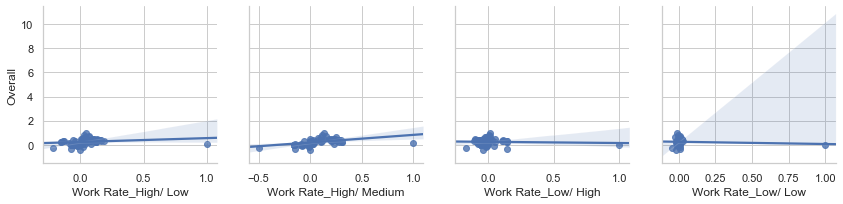

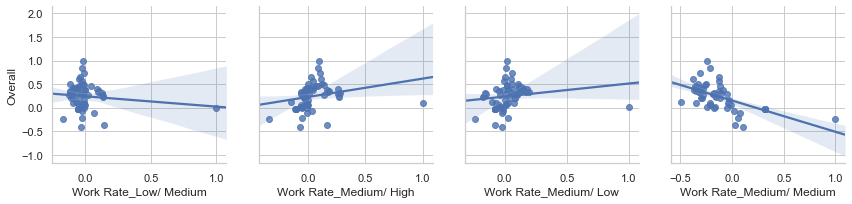

In [92]:
for i in row_groups:
    pp = sns.pairplot(data=data.corr(), y_vars=['Overall'],x_vars=i, kind="reg", height=3)

In [71]:
data.describe()

,ID,Age,Overall,Potential,Wage,Special,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,9.731312,1597.809908,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,0.069259,0.016971,0.002801,0.000330,0.206569,0.623332,0.146208,0.012578,0.470423,0.362498,0.050365,0.002801
std,29965.244204,4.669943,6.908930,6.136496,21.999290,272.586016,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,0.253901,0.129168,0.052853,0.018151,0.404855,0.484564,0.353324,0.111445,0.499138,0.480735,0.218703,0.052853
min,16.000000,16.000000,46.000000,48.000000,0.000000,731.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,1457.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,221759.000000,25.000000,66.000000,71.000000,3.000000,1635.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,236529.500000,28.000000,71.000000,75.000000,9.000000,1787.

In [95]:
data = data['Position'].apply(lambda x.drop: if x == 'GK')

SyntaxError: invalid syntax (<ipython-input-95-459dcbe2bfb7>, line 1)